#Import Packages


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import sklearn
import datetime
from sklearn import preprocessing #scaling
from sklearn.model_selection import train_test_split,GridSearchCV

#Reading Data

In [17]:
df=pd.read_csv("/content/drive/MyDrive/ML_BH/ECommerce_consumer behaviour.csv")
df.info()
df=df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [14]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


Missing Values

In [18]:
df.isna().sum()
print("before ",len(df))
print(100*(124342/len(df))) #only 6% of data
df=df.dropna()
print("after ",len(df))

before  2019501
6.157065532525114
after  1895159


DataType


In [20]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)


#Data Exploration

In [21]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [22]:
unique_values = df.apply(lambda x: x.unique())
unique_values

order_id                  [1201011, 1906860, 2766469, 3195784, 1304367, ...
user_id                   [147243, 195275, 58222, 120094, 53959, 176782,...
order_number              [14, 81, 3, 11, 5, 12, 78, 2, 10, 13, 8, 6, 4,...
order_dow                                             [0, 1, 6, 5, 3, 2, 4]
order_hour_of_day         [16, 11, 17, 1, 8, 10, 6, 18, 9, 12, 13, 14, 1...
days_since_prior_order    [3, 6, 7, 30, 20, 4, 8, 15, 10, 28, 9, 12, 11,...
product_id                [94, 83, 24, 120, 91, 8, 52, 36, 121, 86, 43, ...
add_to_cart_order         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
reordered                                                            [0, 1]
department_id             [7, 4, 16, 3, 1, 14, 13, 12, 19, 17, 11, 18, 2...
department                [beverages, produce, dairy eggs, bakery, froze...
product_name              [tea, fresh vegetables, fresh fruits, yogurt, ...
dtype: object

<ipython-input-46-d57d87bc338d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)


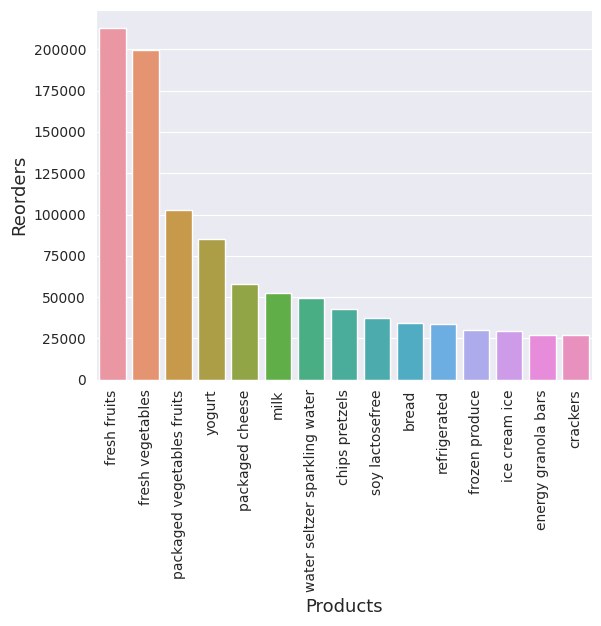

In [46]:
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Reorders', fontsize=13)
plt.xlabel('Products', fontsize=13)
plt.show()

###Data Prepration

In [50]:
df.columns
df_select=df[['user_id','order_dow','order_hour_of_day','days_since_prior_order']]
df_select

,user_id,order_dow,order_hour_of_day,days_since_prior_order
22,147243,0,16,3
23,147243,0,16,3
24,147243,0,16,3
25,147243,0,16,3
26,147243,0,16,3
...,...,...,...,...
2019496,199430,3,18,5
2019497,128787,2,19,3
2019498,128787,2,19,3
2019499,128787,2,19,3


In [66]:
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd = clst_prd.reset_index()
clst_prd = clst_prd.rename_axis('Index_Label')
clst_prd.columns

Index(['user_id', 'alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
       'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta',
       'frozen', 'household', 'international', 'meat seafood', 'missing',
       'other', 'pantry', 'personal care', 'pets', 'produce', 'snacks'],
      dtype='object', name='department')

In [76]:
merged_df = pd.merge(df_select,clst_prd, on='user_id',how='left')

In [79]:
merged_df=merged_df.drop_duplicates()
merged_df

,user_id,order_dow,order_hour_of_day,days_since_prior_order,alcohol,babies,bakery,beverages,breakfast,bulk,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
0,147243,0,16,3,0,0,1,1,2,0,...,0,1,2,0,0,4,1,0,18,4
15,195275,1,11,3,0,0,3,4,0,0,...,0,0,0,0,0,1,0,0,24,5
26,58222,6,11,6,0,0,0,1,0,0,...,0,0,1,0,0,4,0,0,3,0
41,120094,5,17,7,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,3,1
47,53959,5,1,30,0,2,0,3,1,0,...,12,0,0,0,0,0,9,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895091,137024,3,8,8,0,0,2,0,0,0,...,3,0,2,0,1,3,0,0,8,2
1895100,190356,6,15,3,0,0,1,7,3,0,...,0,1,1,0,0,11,1,0,42,2
1895118,84264,3,13,21,0,0,3,0,1,0,...,0,0,3,0,0,2,0,0,7,2
1895147,199430,3,18,5,0,0,1,0,1,0,...,2,0,4,0,0,8,0,0,7,3


###K-means

In [80]:
X_train=merged_df.drop(columns=['user_id'])

In [82]:
from sklearn.cluster import KMeans , k_means
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 2 Cluster is :  45157300.62672779


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 3 Cluster is :  33992949.33667059


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 4 Cluster is :  30077928.984248243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 5 Cluster is :  28312130.024551354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 6 Cluster is :  26817741.943136133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 7 Cluster is :  25515004.29881731


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 8 Cluster is :  24548258.40615668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 9 Cluster is :  23714653.025020365


<Axes: >

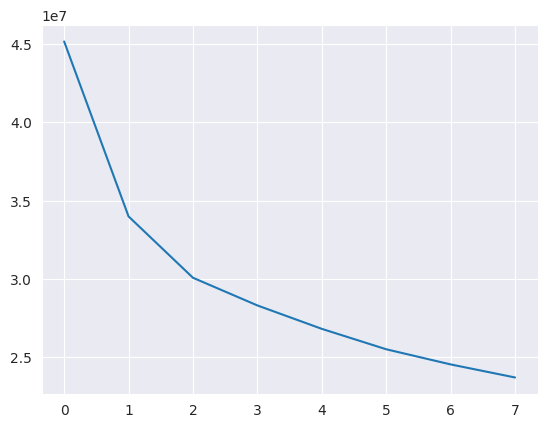

In [85]:
sns.lineplot(inertia)

In [92]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)
predictions = kmeans.predict(X_train)
unique , counts = np.unique(predictions, return_counts=True)
clusters_count = pd.DataFrame({'unique': unique,'counts': counts})
clusters_count

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,unique,counts
0,0,40654
1,1,94752
2,2,41128
3,3,10374


###PCA

<Figure size 640x480 with 0 Axes>

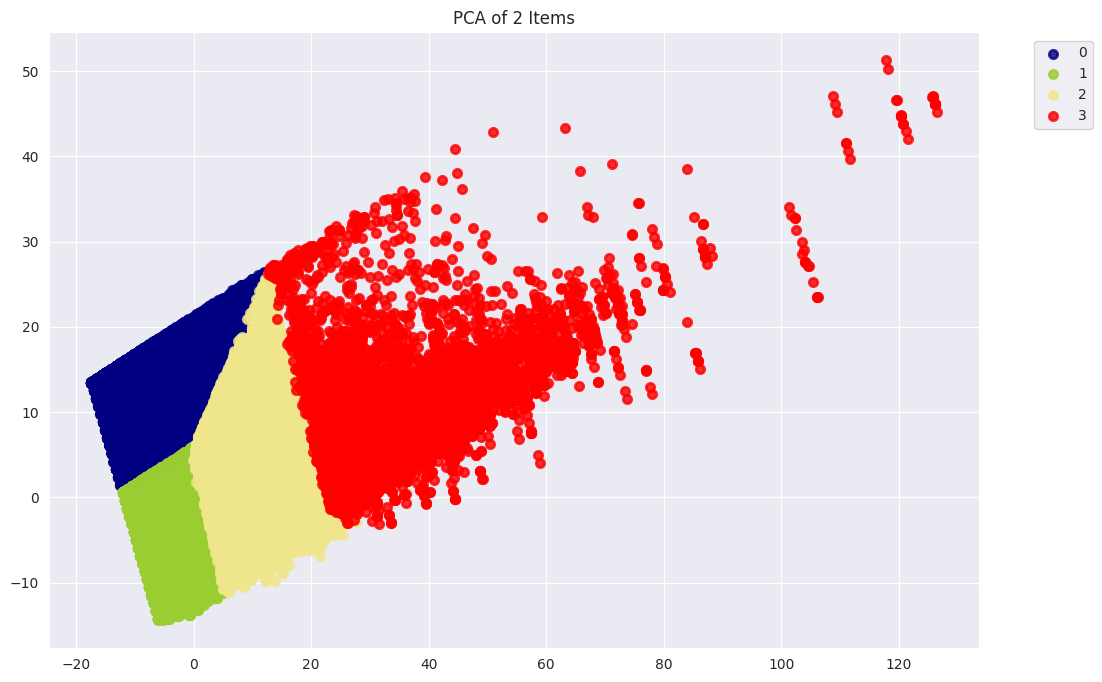

In [95]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = X_train
y_num = predictions
pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)
target_names = ["0","1","2", "3"]
colors = ['navy', 'yellowgreen', 'khaki', 'red', 'black']
plt.figure()
plt.figure(figsize=(12,8))
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=2,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

###Kmeans and PCA

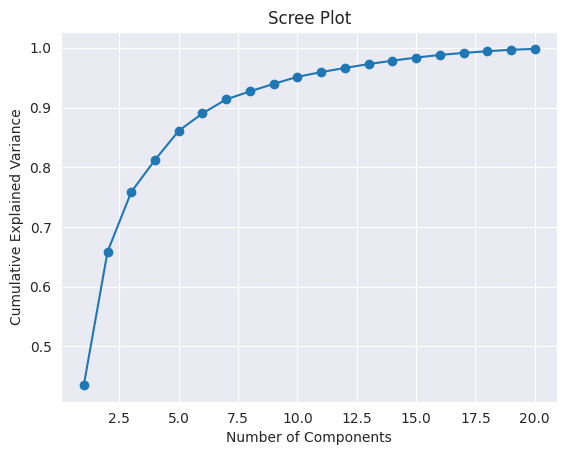

In [104]:
X = X_train
y_num = predictions
pca = PCA(n_components=20, random_state = 453)
pca.fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [105]:
X = X_train
y_num = predictions
pca = PCA(n_components=12, random_state = 453)
pca.fit(X_train)
components = pca.transform(X_train)
new_df = pd.DataFrame(components)

In [106]:
new_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,21.578067,-0.566813,12.830700,-4.552726,-14.634100,1.651998,-0.157213,-1.095568,2.608775,-2.369630,0.033929,-1.526489
1,16.032993,-1.697586,-5.569647,2.964915,2.380876,-0.162524,-3.368711,-1.095473,1.553441,-0.489195,1.566196,0.231745
2,-3.063884,-6.764250,0.961059,2.126023,-3.853456,-0.551873,-0.471885,2.946127,-2.746543,-0.132530,-1.529451,-1.381473
3,-5.444432,-6.498773,-1.827774,-3.324507,0.820234,-0.666751,-1.135318,0.512173,-2.120482,0.065995,-0.417595,-0.602661
4,-10.699061,15.854712,3.213886,12.442192,-0.101723,-1.755131,0.161990,2.027897,-2.147143,3.512891,-0.988069,11.682547
...,...,...,...,...,...,...,...,...,...,...,...,...
186903,2.571746,-2.275420,2.369512,4.734304,-3.229709,2.386982,8.283960,-0.736503,-0.309372,-1.481248,-0.556313,1.611904
186904,34.257639,5.945567,-8.943262,-1.290393,1.479310,-4.406242,2.125274,5.562012,-2.393014,-1.282410,-3.364242,-2.256062
186905,-2.982169,9.464975,3.453519,-0.334238,-1.893037,2.771414,11.061835,-1.989082,-0.460853,-2.028215,1.425163,-0.796368
186906,7.085721,-4.131738,8.552438,-5.829089,-7.687044,2.494281,3.291463,5.658582,0.935831,-1.126126,1.938093,-2.639033


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 2 Cluster is :  45157300.62672779


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 3 Cluster is :  33992949.33667059


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 4 Cluster is :  30077928.984248243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 5 Cluster is :  28312130.024551354


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 6 Cluster is :  26817741.943136133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 7 Cluster is :  25515004.29881731


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 8 Cluster is :  24548258.40615668


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The inertia for : 9 Cluster is :  23714653.025020365


<Axes: >

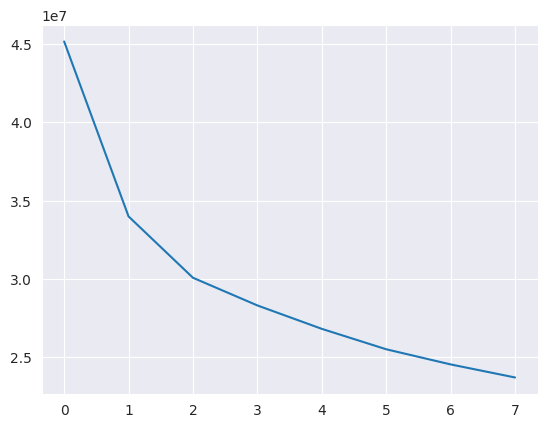

In [107]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

sns.lineplot(inertia)

In [108]:
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)
predictions = kmeans.predict(X_train)
unique , counts = np.unique(predictions, return_counts=True)
clusters_count = pd.DataFrame({'unique': unique,'counts': counts})
clusters_count

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,unique,counts
0,0,9107
1,1,40436
2,2,9951
3,3,35094
4,4,92320
